In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time, os
import cv2
import utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.transforms import transforms

In [2]:
dog_dict = {
    'affenpinscher':0,
    'beagle':1,
    'boxer':2,
    'chihuahua':3,
    'frenchbulldog':4,
    'goldenretriever':5,
    'rottweiler':6,
    'schnauzer':7,
    'sheepdog':8,
    'spaniel':9
}

In [3]:
train_img_path = '../dog_dataset/train_64x64'
test_img_path = '../dog_dataset/test_64x64'

In [4]:
# # create train data and train label
# train_data = torch.Tensor([])
# train_label = []
# for img in os.listdir(train_img_path):
#     pic_data = []
#     breed = img.split('_')[0]
#     pic_label = dog_dict[breed]
#     train_label.append(pic_label)
#     pic = Image.open(os.path.join(train_img_path,img)) 
#     resize = transforms.Resize([64,64])
#     pic = resize(pic)
#     trans_pic = transforms.ToTensor()(pic)
#     trans_pic = torch.unsqueeze(trans_pic, dim=0)
#     train_data = torch.cat((train_data, trans_pic),0)

In [5]:
# rgb to gray
rgb_to_gray = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                    transforms.ToTensor()])
train_data = torch.Tensor([])
train_label = []
for img in os.listdir(train_img_path):
    pic_data = []
    breed = img.split('_')[0]
    pic_label = dog_dict[breed]
    train_label.append(pic_label)
    pic = Image.open(os.path.join(train_img_path,img))
    pic = rgb_to_gray(pic)
    resize = transforms.Resize([64,64])
    pic = resize(pic)
#     trans_pic = transforms.ToTensor()(pic)
#     trans_pic = rgb_to_gray(pic)
#     trans_pic = torch.unsqueeze(pic, dim=0)
    train_data = torch.cat((train_data, pic),0)

In [6]:
train_label = torch.tensor(train_label)

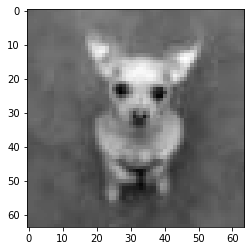

tensor(3)

In [12]:
utils.show(train_data[19])
train_label[19]

In [8]:
# save train data and label to .pt file
torch.save(train_data, '../dog_dataset/train_data_gray.pt')
torch.save(train_label, '../dog_dataset/train_label_gray.pt')

In [9]:
# # create test data and test label
# test_data = torch.Tensor([])
# test_label = []
# for img in os.listdir(test_img_path):
#     pic_data = []
#     breed = img.split('_')[0]
#     pic_label = dog_dict[breed]
#     test_label.append(pic_label)
#     pic = Image.open(os.path.join(test_img_path,img)) 
#     resize = transforms.Resize([64,64])
#     pic = resize(pic)
#     trans_pic = transforms.ToTensor()(pic)
#     trans_pic = torch.unsqueeze(trans_pic, dim=0)
#     test_data = torch.cat((test_data, trans_pic),0)

In [10]:
# rgb to gray
rgb_to_gray = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                    transforms.ToTensor()])
test_data = torch.Tensor([])
test_label = []
for img in os.listdir(test_img_path):
    pic_data = []
    breed = img.split('_')[0]
    pic_label = dog_dict[breed]
    test_label.append(pic_label)
    pic = Image.open(os.path.join(test_img_path,img))
    pic = rgb_to_gray(pic)
    resize = transforms.Resize([64,64])
    pic = resize(pic)
#     trans_pic = transforms.ToTensor()(pic)
#     trans_pic = rgb_to_gray(pic)
#     trans_pic = torch.unsqueeze(pic, dim=0)
    test_data = torch.cat((test_data, pic),0)

In [11]:
test_label = torch.tensor(test_label)

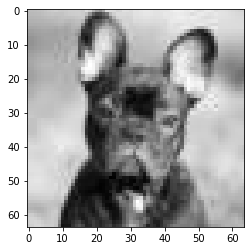

tensor(4)

In [13]:
utils.show(test_data[19])
test_label[19]

In [14]:
# save test data and label to .pt file
torch.save(test_data, '../dog_dataset/test_data_gray.pt')
torch.save(test_label, '../dog_dataset/test_label_gray.pt')

In [15]:
train_data = torch.load('../dog_dataset/train_data_gray.pt')
train_label = torch.load('../dog_dataset/train_label_gray.pt')

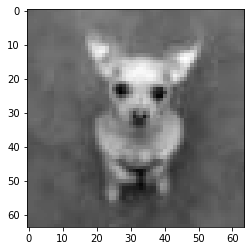

tensor(3)

In [16]:
utils.show(train_data[19])
train_label[19]

In [17]:
# test_data = torch.load('../dataset_v1.1/test.pt')
# test_label = torch.load('../dataset_v1.1/test_label.pt')

In [18]:
test_data = torch.load('../dog_dataset/test_data_gray.pt')
test_label = torch.load('../dog_dataset/test_label_gray.pt')

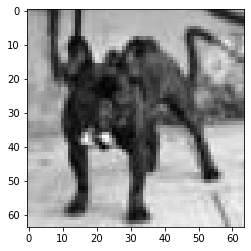

tensor(4)

In [19]:
utils.show(test_data[3])
test_label[3]